In [1]:
!pip install ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.7/78.2 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NnkXQPWKquXT8Pq5fLOZ")
project = rf.workspace("class-ymngg").project("butterfly-cxsgm")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.48, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to butterfly-1 in yolov8:: 100%|██████████| 612/612 [00:00<00:00, 796.79it/s]


In [3]:
!yolo segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=15 imgsz=640

100% 88.1M/88.1M [00:00<00:00, 371MB/s]
Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/butterfly-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

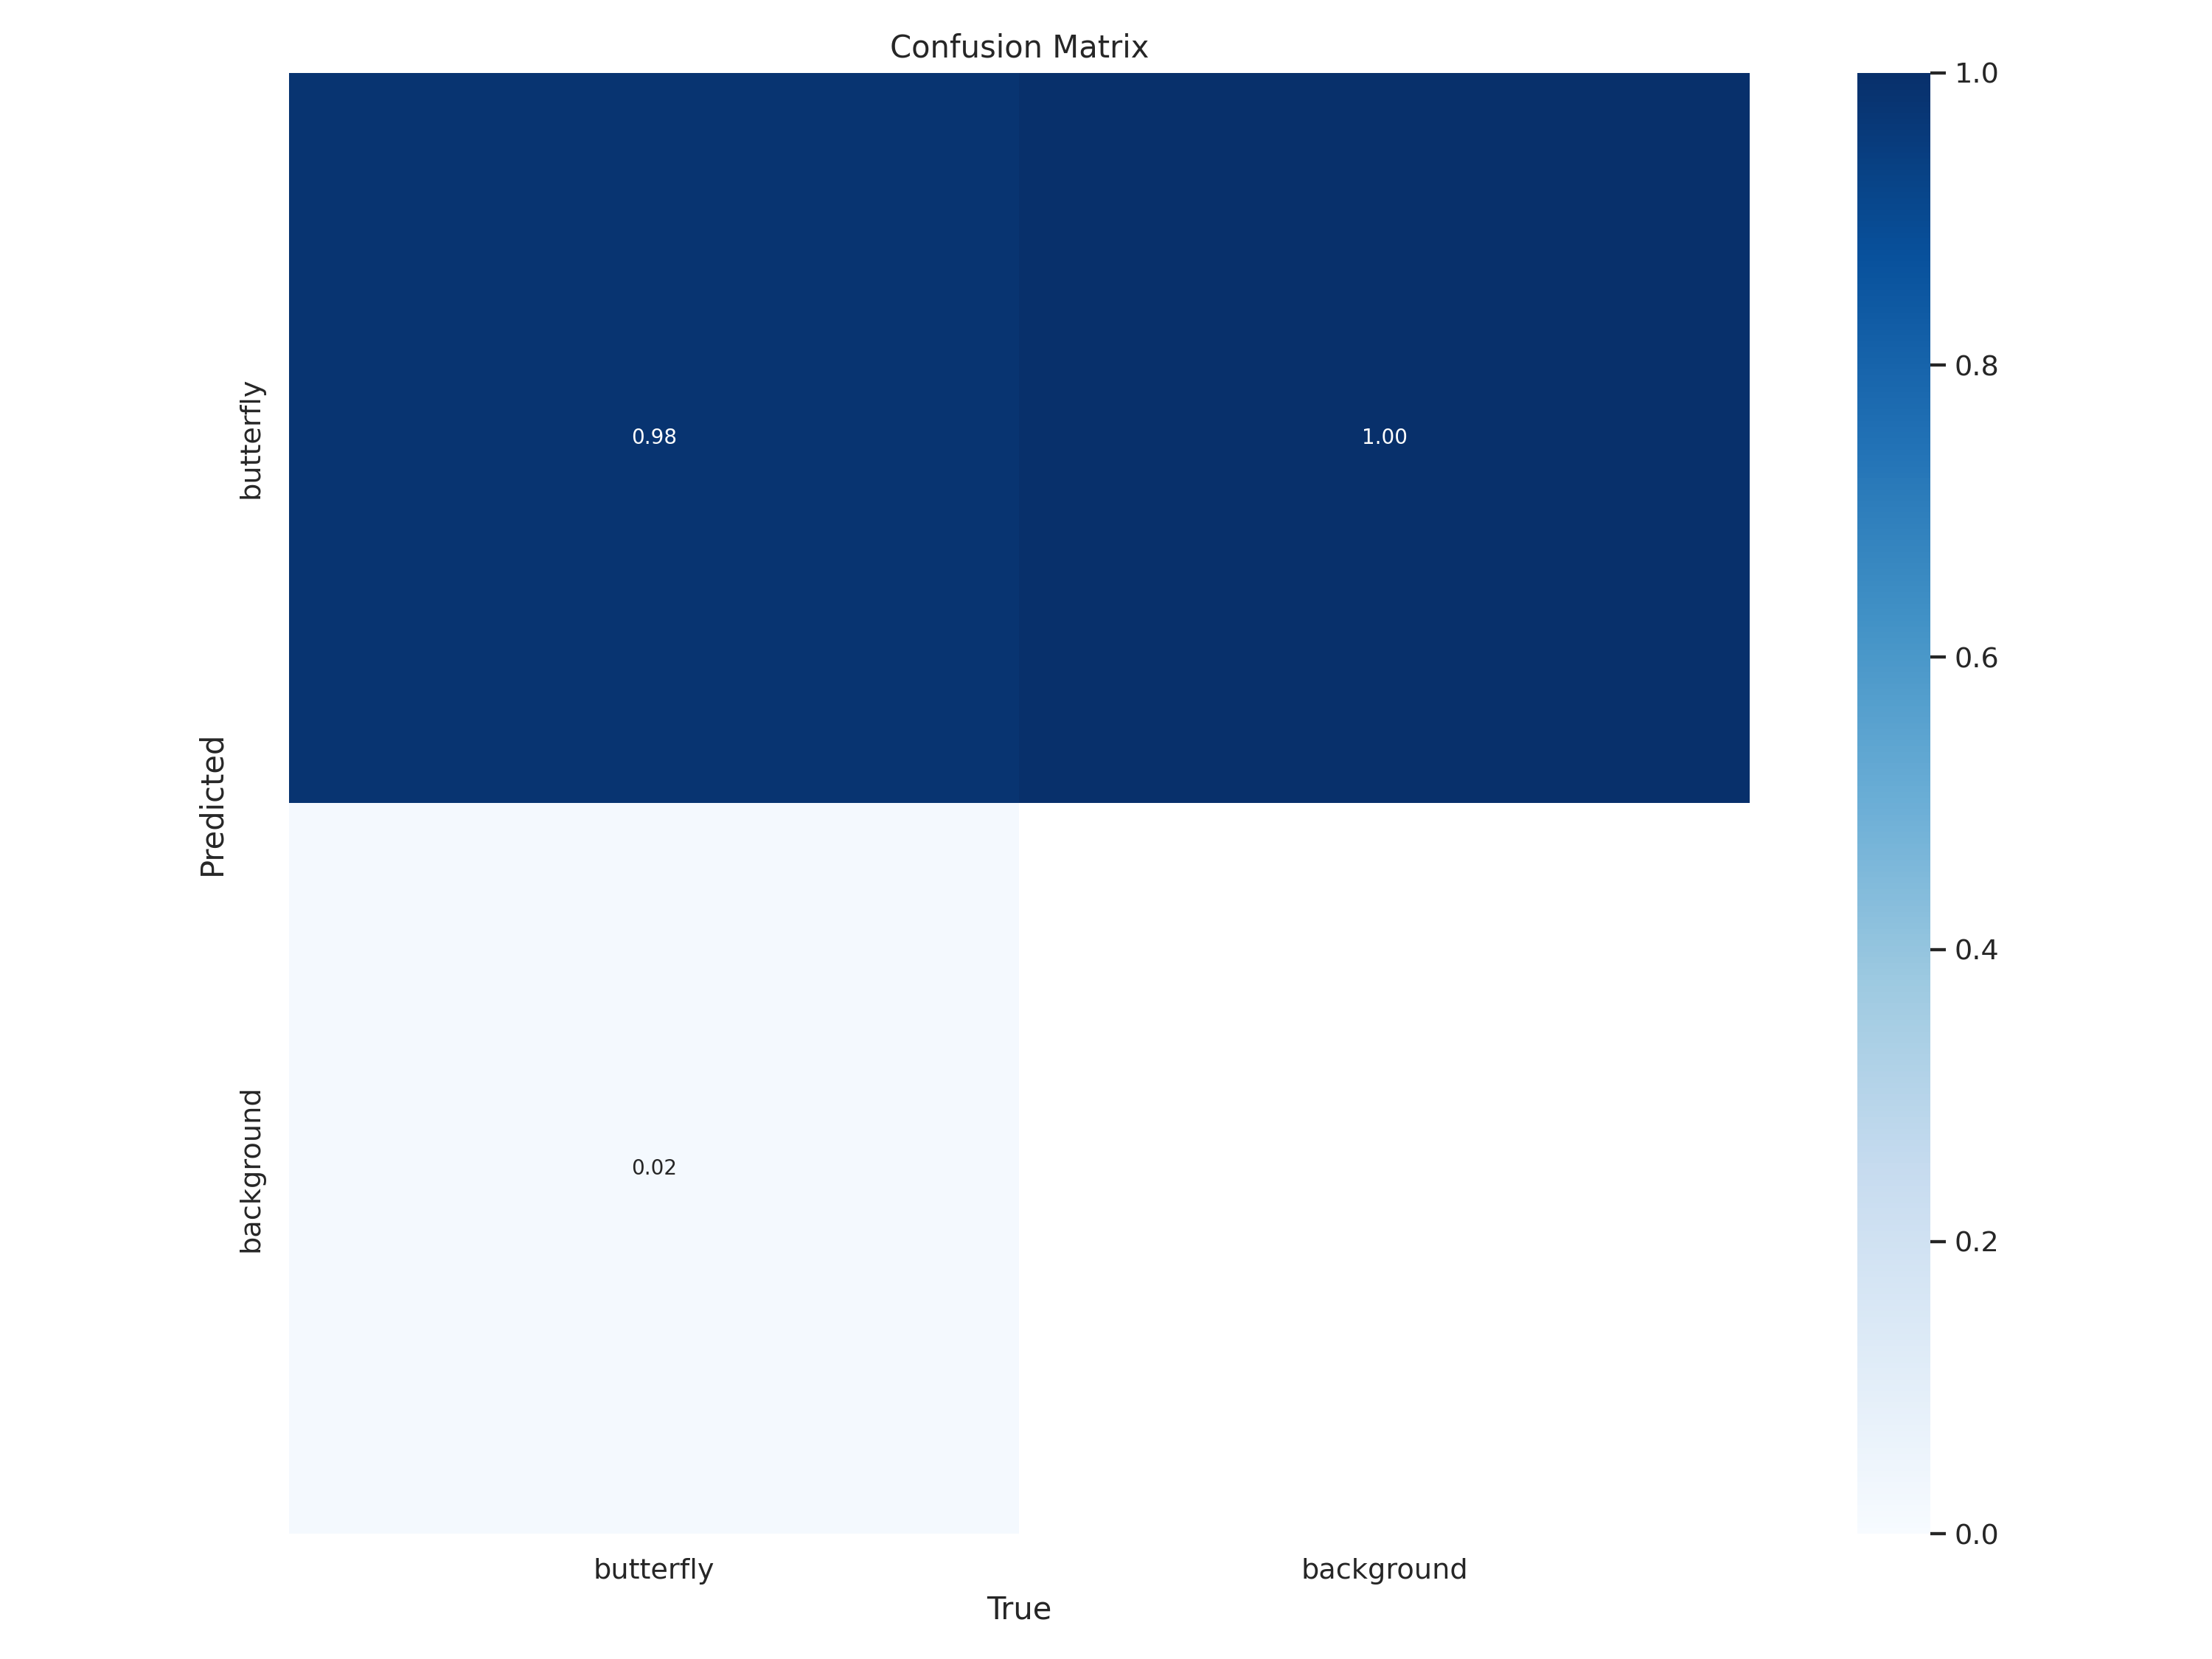

In [4]:
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

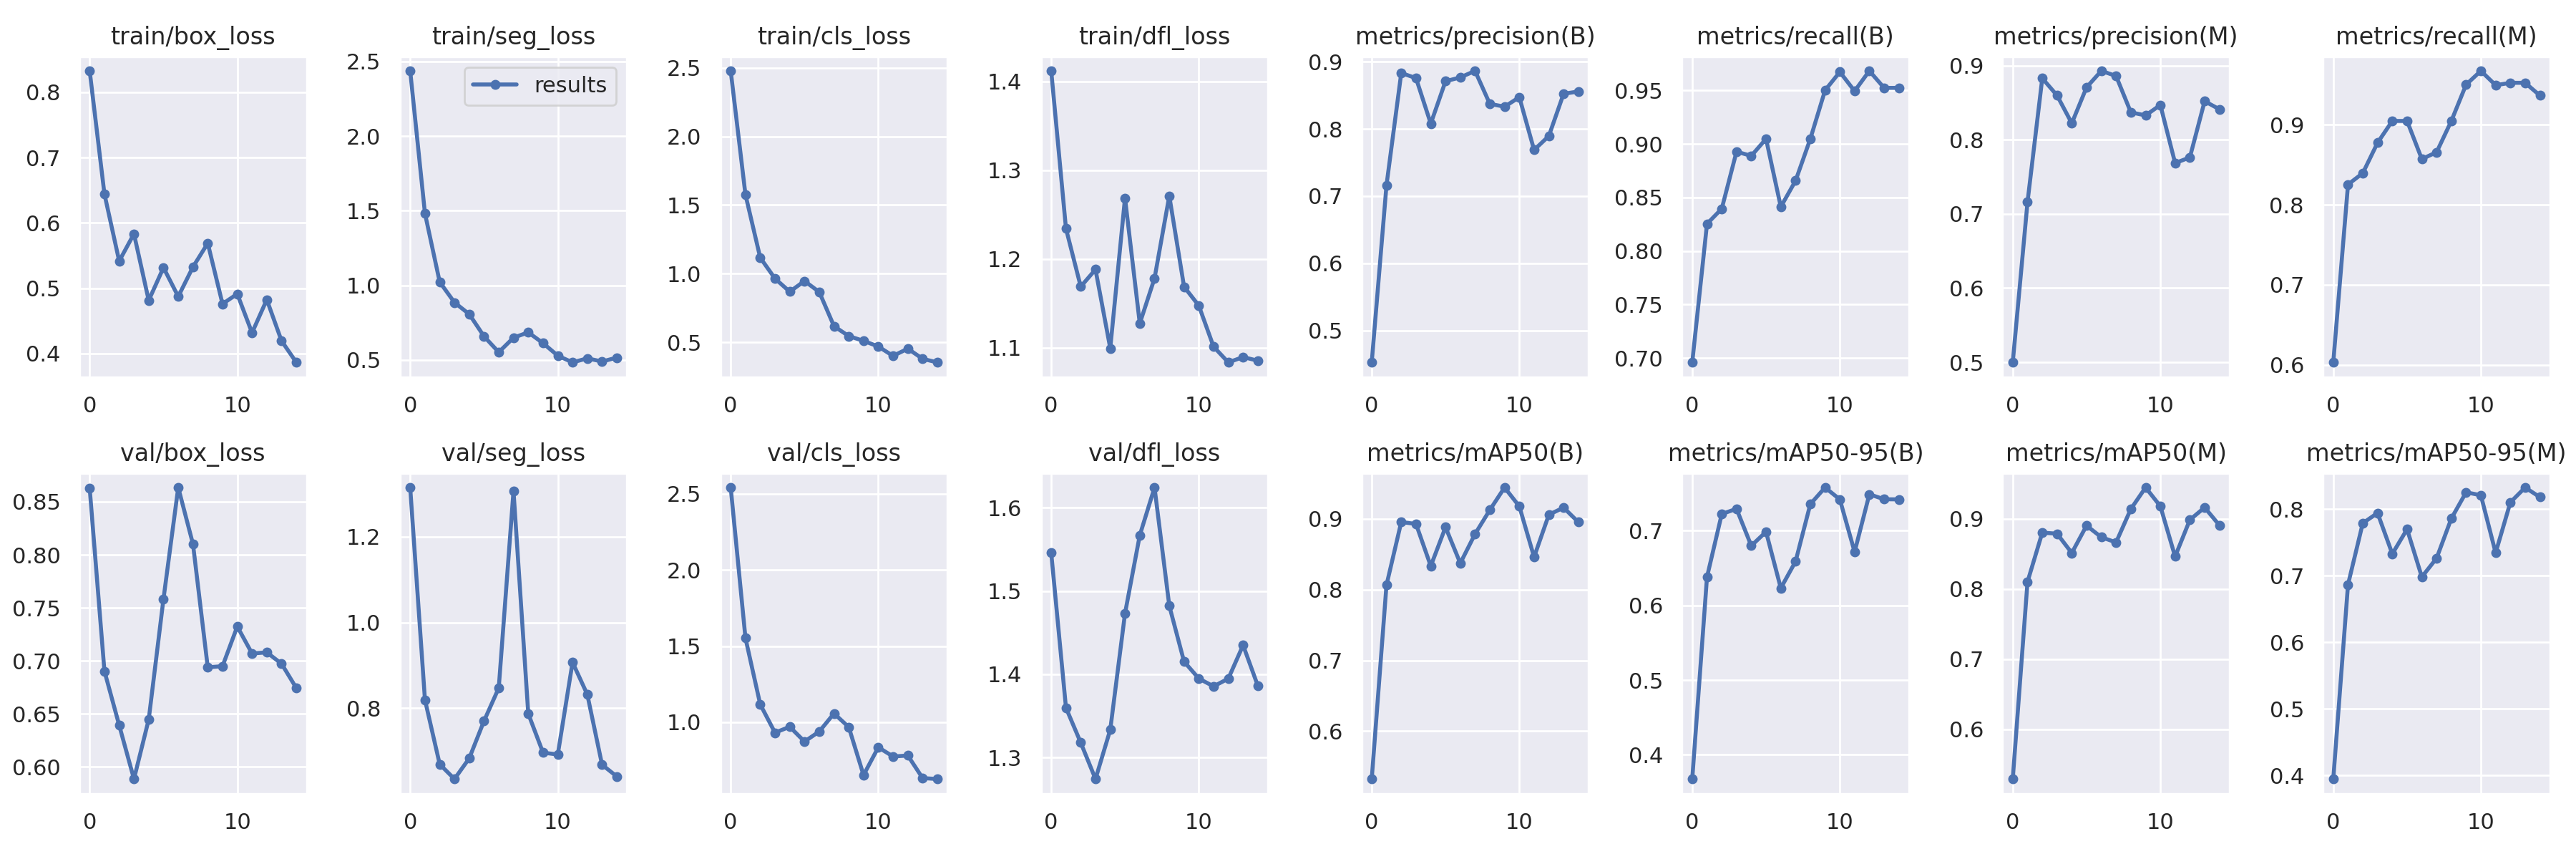

In [10]:
Image(filename=f'/content/runs/segment/train/results.png', width=700)

In [11]:
!yolo segment mode=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/butterfly-1/valid/labels.cache... 60 images, 3 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.59s/it]
                   all         60         63      0.833       0.95      0.944      0.759      0.833       0.95      0.944      0.822
Speed: 4.6ms preprocess, 48.6ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/segment/val


In [16]:
!yolo segment mode=predict model=/content/runs/segment/train/weights/best.pt source={dataset.location}/test/images conf=0.5 save=True save_txt=True

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/30 /content/butterfly-1/test/images/butterfly-112-_jpg.rf.21f108cab5f65b2b0ee2ab7ea6c7942e.jpg: 640x640 2 butterflys, 78.2ms
image 2/30 /content/butterfly-1/test/images/butterfly-120-_jpg.rf.18d660d47635c14ab8e41b7342afe2e8.jpg: 640x640 1 butterfly, 66.5ms
image 3/30 /content/butterfly-1/test/images/butterfly-122-_jpg.rf.1af7bb31bc38e509318a7595adb0c5d8.jpg: 640x640 1 butterfly, 45.4ms
image 4/30 /content/butterfly-1/test/images/butterfly-143-_jpg.rf.ddf6578aa3a06bce69fbdddd48c56976.jpg: 640x640 1 butterfly, 45.5ms
image 5/30 /content/butterfly-1/test/images/butterfly-159-_jpg.rf.de7959218b438feb29198add96460301.jpg: 640x640 1 butterfly, 44.8ms
image 6/30 /content/butterfly-1/test/images/butterfly-177-_jpg.rf.48b7a236bd7d2ad53eadfc0abc396984.jpg: 640x640 1 butterfly, 41.3ms
image 7/30 /content/butterfly-1

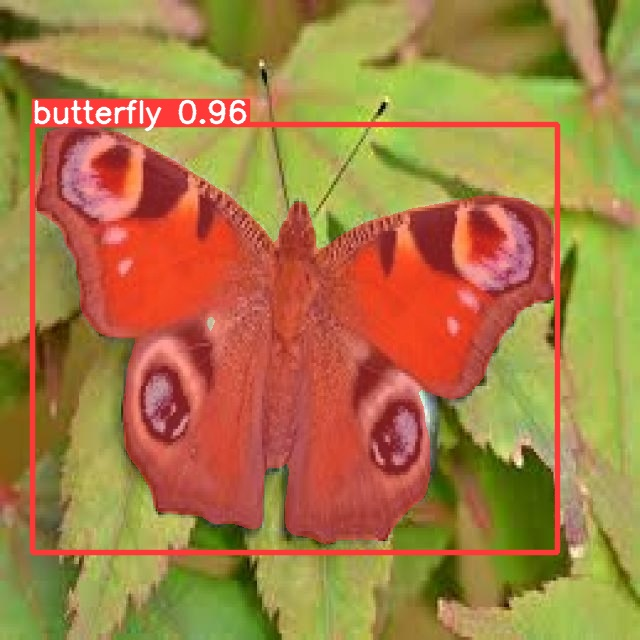

/n


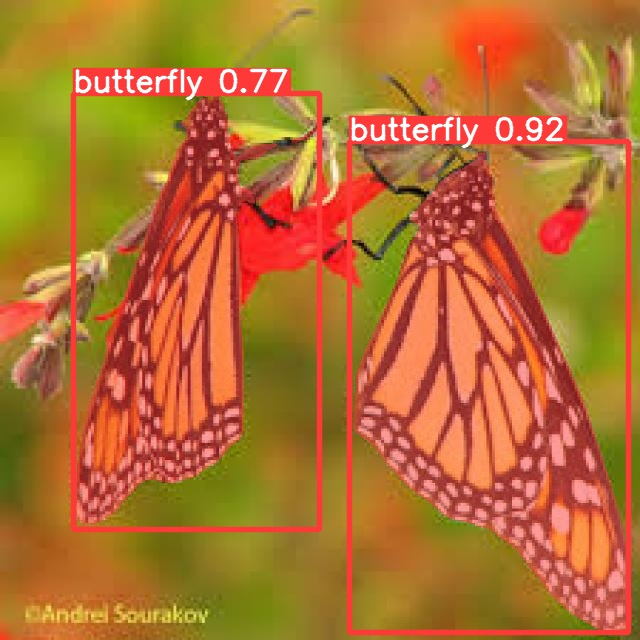

/n


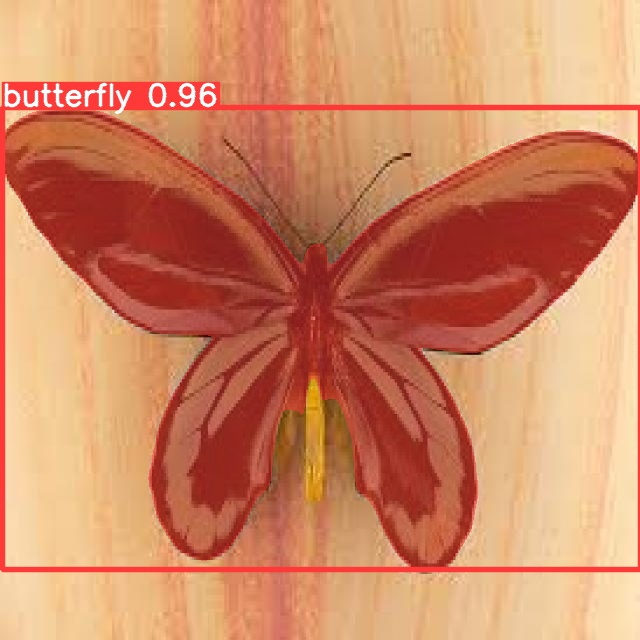

/n


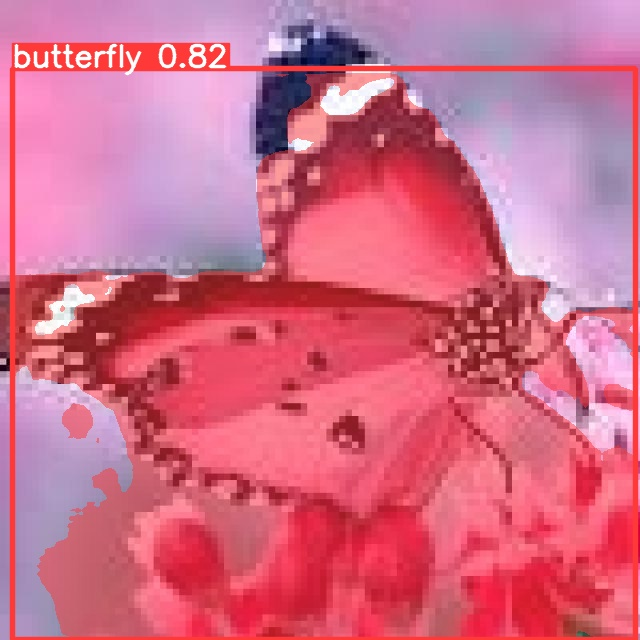

/n


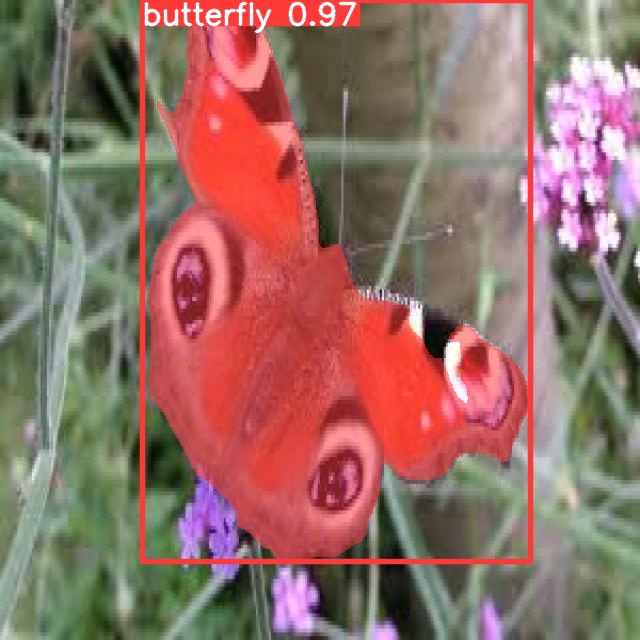

/n


In [17]:
import glob
from IPython.display import display, Image
for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg')[:5]:
  display(Image(filename=image_path,height=500))
  print("/n")